# PRICE-PREDICTION-OF-HOUSE-

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [162]:
train_df = pd.read_csv('C:\\Users\HP\Downloads\\train.csv')

In [163]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [164]:
train_df.shape

(1460, 81)

In [165]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [166]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### show null values using heatmap

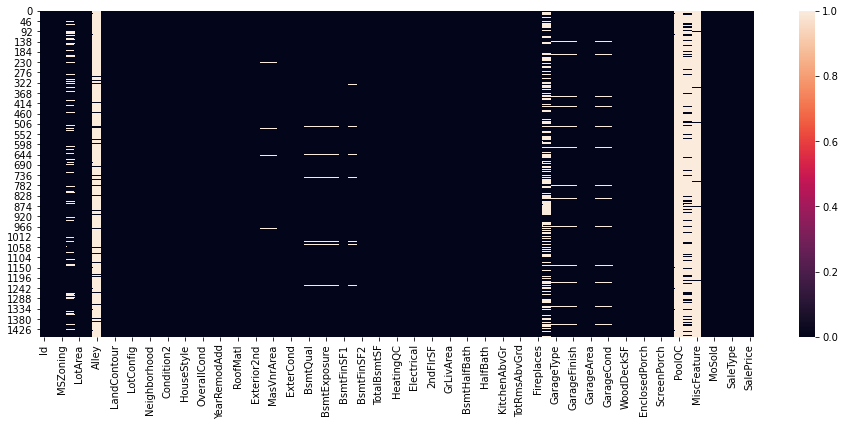

In [167]:

plt.figure(figsize=(16,6))
sns.heatmap(train_df.isnull())

# Handling Missing data

In [168]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[:10]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [169]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df.drop(['Alley'],axis=1,inplace=True)

In [170]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[9:20]

LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [171]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[19:30]

YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
dtype: int64

In [172]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])

In [173]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[29:40]

BsmtQual         0
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [174]:
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])

In [175]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[39:50]

HeatingQC       0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [176]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [177]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[55:70]

Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond        81
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
dtype: int64

In [178]:
train_df.drop(['FireplaceQu'],axis=1,inplace=True)
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mode()[0])
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

In [179]:
pd.set_option('display.max_rows',100)
train_df.isnull().sum()[69:]

PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [180]:
train_df.drop(['PoolQC','Fence', 'MiscFeature'],axis=1,inplace=True)
train_df.isnull().sum().max()

0

In [181]:
train_df.drop(['Id'],axis=1,inplace=True)

In [182]:
train_df.shape

(1460, 75)

In [183]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

### show null values using heatmap

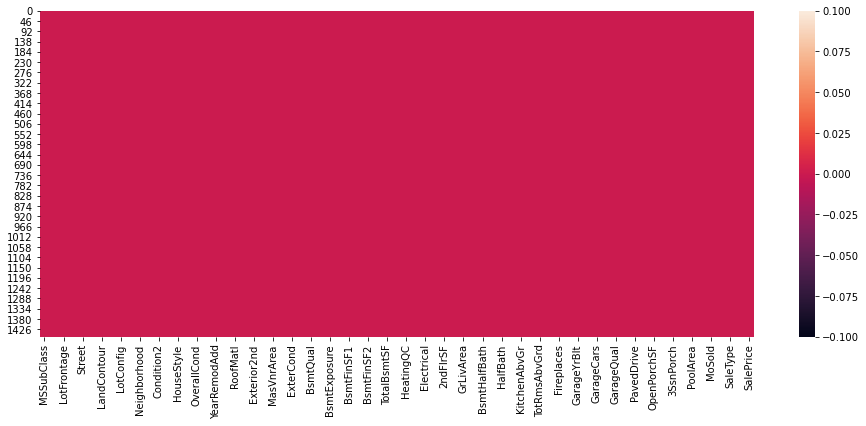

In [184]:
plt.figure(figsize=(16,6))
sns.heatmap(train_df.isnull())

# Read testing dataset 

In [185]:
test_dff = pd.read_csv('C:\\Users\HP\Downloads\\test.csv')

In [186]:
test_dff.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [187]:
test_dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [188]:
test_dff.shape

(1459, 80)

In [189]:
test_df = test_dff.copy()

In [190]:
test_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [191]:
test_dff.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [192]:
test_dff.isnull().sum()[:20]

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [193]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

test_df.drop(['Alley'],axis=1,inplace=True)

test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])

In [194]:
test_df.isnull().sum()[20:45]

RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
dtype: int64

In [195]:
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

In [196]:
test_df.isnull().sum()[45:65]

GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
Fireplaces        0
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
PavedDrive        0
dtype: int64

In [197]:
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())

test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])

test_df.drop(['FireplaceQu'],axis=1,inplace=True)

test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])

test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [198]:
test_df.isnull().sum()[65:]

OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1456
Fence            1169
MiscFeature      1408
MiscVal             0
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
dtype: int64

In [199]:
test_df.drop(['PoolQC','Fence', 'MiscFeature'],axis=1,inplace=True)

test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [200]:
test_df.isnull().sum().max()

0

In [201]:
test_df.shape

(1459, 75)

In [202]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

## Show null values using heatmap

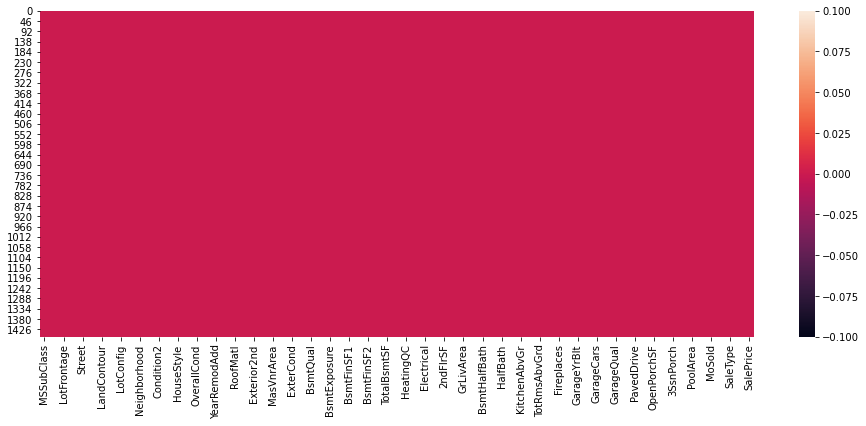

In [203]:
plt.figure(figsize=(16,6))
sns.heatmap(train_df.isnull())

In [204]:
test_df.to_csv('newtest.csv')

In [205]:

train_obj_col = train_df.select_dtypes(include=['object'])

In [206]:
train_obj_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

###### create a function which handling categorical feature and convert it into categorical feature

In [207]:
def category_onehot_encoding(multicolumns):
    df_final = final_df
    i=0
    for fields in multicolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final = pd.concat([final_df,df_final],axis=1)
    
    return df_final


In [208]:
main_df = train_df.copy()

### combine test data

In [209]:

test_data = pd.read_csv('newtest.csv')

In [210]:
test_data.shape

(1459, 76)

In [211]:
train_data = train_df.copy()

In [212]:
test_data.drop([test_data.columns[0]],axis=1,inplace=True)

In [213]:
test_data.shape

(1459, 75)

In [214]:
final_df = pd.concat([train_data,test_data],axis=0)

### show null values using heatmap

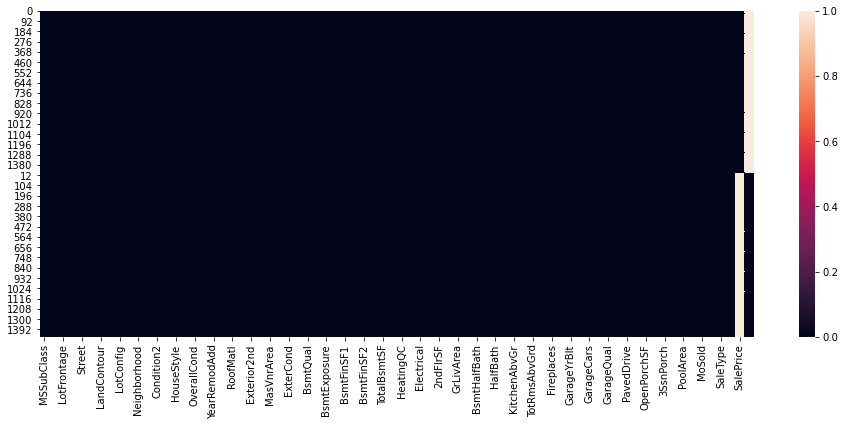

In [215]:
plt.figure(figsize=(16,6))
sns.heatmap(final_df.isnull())

In [216]:
final_df.shape

(2919, 76)

In [217]:
final_df = category_onehot_encoding(train_obj_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [360]:
final_df.shape

(2919, 178)

In [361]:

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [362]:
final_df.shape

(2919, 178)

In [363]:

df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [364]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [377]:
df_train.shape

(1460, 178)

In [378]:
df_test.shape

(1459, 177)

In [392]:
x_train = df_train.drop(['SalePrice','Id'],axis=1)
y_train = df_train['SalePrice']

In [393]:
demo = df_test.drop(['Id'],axis=1)

In [394]:
from sklearn.model_selection import train_test_split

In [395]:
X_train , X_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.01)

In [396]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [397]:
clf.fit(X_train,y_train)

LinearRegression()

In [398]:
clf.predict(X_test)

array([107829.31263283, 148264.75143478, 114522.26033672, 312015.59582024,
       231830.43641508, 226975.19632826, 163650.93515952, 201641.28873075,
       453005.90598529, 126199.83822472, 162468.49208683, 303420.76566629,
       115566.60090307, 131779.31442859, 127310.27076262])

In [399]:
y_test

223      97000.0
43      130250.0
671     103600.0
524     315750.0
1342    228500.0
964     214900.0
668     168000.0
558     175000.0
178     501837.0
1370    105000.0
783     165500.0
249     277000.0
291     135900.0
719     128500.0
697     123500.0
Name: SalePrice, dtype: float64

In [400]:
clf.score(X_test,y_test)

0.9664268253511782